<a href="https://colab.research.google.com/github/Bhargavi1504/Unsupervised_full-project/blob/main/Unsupervised_Learning_Full_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
#customers dataset
import pandas as pd
import numpy as np

np.random.seed(42)
n_customers=2000

#generating fields
customer_id=[f'CUST{1000+i}' for i in range(n_customers)]
ages=np.random.randint(18,70,n_customers)
genders=np.random.choice(['male','female','other'],n_customers,p=[0.48,0.48,0.04])
locations=np.random.choice(['North','South','East','West'],n_customers)
income=np.random.normal(loc=60000,scale=15000,size=n_customers).astype(int)
devices = np.random.choice(['Mobile', 'Desktop', 'Tablet'], size=n_customers, p=[0.6, 0.3, 0.1])
sessions=np.random.poisson(lam=5,size=n_customers)
loyalty=np.random.beta(2,5,size=n_customers)*100
time_spent=np.random.normal(15,5,size=n_customers)
return_data=np.random.normal(0.15,0.1,size=n_customers)
is_fraud=np.random.choice([0,1],size=n_customers,p=[0.95,0.05])

#Assemble
d_customers=pd.DataFrame({
    'Customer_id': customer_id,
    'Age' : ages,
    'gender': genders,
    'location': locations,
    'income': income,
    'device': devices,
    'sessions_per_week': sessions,
    'loyalty_score': loyalty.round(2),
    'avg_time_spent_mins': time_spent.round(2),
    'return_rate': return_data.round(2),
    'is_fraudulent': is_fraud

})# Save to CSV
d_customers.to_csv("d_customers.csv", index=False)
print("✅ d_customers.csv created successfully! Shape:", d_customers.shape)

✅ d_customers.csv created successfully! Shape: (2000, 11)


In [162]:
# products dataset
import pandas as pd
import numpy as np

np.random.seed(42)
n_products = 300

# Generating fields
product_id = [f'PROD{1000 + i}' for i in range(n_products)]
categories = ['Electronics', 'Fashion', 'Groceries', 'Books', 'Home Decor', 'Sports', 'Toys']
brands = ['BrandA', 'BrandB', 'BrandC', 'BrandD', 'BrandE']
product_category = np.random.choice(categories, size=n_products)
product_brand = np.random.choice(brands, size=n_products)
stock_status = np.random.choice(['In Stock', 'Out of Stock'], size=n_products, p=[0.85, 0.15])

# Category-wise pricing function
def get_price(i):
    if i == 'Electronics':
        return round(np.random.uniform(3000, 50000), 2)
    elif i == 'Fashion':
        return round(np.random.uniform(500, 5000), 2)
    elif i == 'Groceries':
        return round(np.random.uniform(50, 500), 2)
    elif i == 'Books':
        return round(np.random.uniform(200, 1500), 2)
    elif i == 'Home Decor':
        return round(np.random.uniform(300, 8000), 2)
    elif i == 'Sports':
        return round(np.random.uniform(400, 7000), 2)
    elif i == 'Toys':
        return round(np.random.uniform(100, 2000), 2)
    else:
        return round(np.random.uniform(100, 1000), 2)

# Generate prices based on category
product_prices = [get_price(cat) for cat in product_category]

# Product names
product_name = [f'product_{i}' for i in range(n_products)]

# Final product DataFrame
d_products = pd.DataFrame({
    'product_id': product_id,
    'product_name': product_name,
    'category': product_category,
    'brand': product_brand,
    'price': product_prices,
    'stock_status': stock_status
})

# Save to CSV
d_products.to_csv("d_products.csv", index=False)
print("✅ d_products.csv created! Shape:", d_products.shape)


✅ d_products.csv created! Shape: (300, 6)


In [ ]:
#this will help where one row has one time 1

import pandas as pd
import numpy as np

np.random.seed(42)

# Load customer and product tables
customers = pd.read_csv('d_customers.csv')
products = pd.read_csv('d_products.csv')

customer_idx = customers['Customer_id'].tolist()
product_idx = products['product_id'].tolist()

n_transactions = 10000

# Generate fields
transaction_id = [f'TXN{100000+i}' for i in range(n_transactions)]
transaction_customer_id = np.random.choice(customer_idx, size=n_transactions, replace=True)
transaction_product_id = np.random.choice(product_idx, size=n_transactions, replace=True)
quantities = np.random.poisson(lam=2, size=n_transactions) + 1
dates = pd.date_range(start="2024-07-01", end="2025-06-30", periods=n_transactions)
payment_modes = np.random.choice(['Card', 'UPI', 'Wallet', 'Cash on Delivery'], size=n_transactions, p=[0.4, 0.3, 0.15, 0.15])

# Create DataFrame
d_transactions = pd.DataFrame({
    'transaction_id': transaction_id,
    'customer_id': transaction_customer_id,
    'product_id': transaction_product_id,
    'quantity': quantities,
    'transaction_date': dates.date,
    'payment_mode': payment_modes
})

# Save to CSV
d_transactions.to_csv('d_transactions.csv', index=False)
print('✅ d_transactions.csv created! Shape:', d_transactions.shape)


In [163]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Load product and customer data
products = pd.read_csv("d_products.csv")
customers = pd.read_csv("d_customers.csv")

product_ids = products['product_id'].tolist()
customer_ids = customers['Customer_id'].tolist()

n_transactions = 3000  # Unique transactions (baskets)
transaction_data = []

for i in range(n_transactions):
    txn_id = f'TXN{100000 + i}'
    cust_id = np.random.choice(customer_ids)
    date = pd.Timestamp("2024-07-01") + pd.to_timedelta(np.random.randint(0, 365), unit='D')
    payment_mode = np.random.choice(['Card', 'UPI', 'Wallet', 'Cash on Delivery'], p=[0.4, 0.3, 0.15, 0.15])

    # Generate 2–6 products per basket
    n_items = np.random.randint(2, 7)
    selected_products = np.random.choice(product_ids, size=n_items, replace=False)

    for prod_id in selected_products:
        quantity = np.random.poisson(lam=2) + 1
        transaction_data.append([
            txn_id, cust_id, prod_id, quantity, date, payment_mode
        ])

# Create transaction DataFrame
d_transactions = pd.DataFrame(transaction_data, columns=[
    'transaction_id', 'customer_id', 'product_id', 'quantity', 'transaction_date', 'payment_mode'
])

# Save to CSV
d_transactions.to_csv("d_transactions.csv", index=False)
print("✅ Fixed d_transactions.csv created! Shape:", d_transactions.shape)


✅ Fixed d_transactions.csv created! Shape: (12012, 6)


In [164]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Load existing customers and products
customers = pd.read_csv("d_customers.csv")
products = pd.read_csv("d_products.csv")

customer_ids = customers['Customer_id'].tolist()
product_ids = products['product_id'].tolist()

# Simulate ~15,000 ratings (sparse matrix)
n_ratings = 15000

# Randomly assign customer-product pairs
rating_customer_ids = np.random.choice(customer_ids, size=n_ratings, replace=True)
rating_product_ids = np.random.choice(product_ids, size=n_ratings, replace=True)

# Simulate ratings: Gaussian around 4.0, clipped to 1–5, rounded to nearest 0.5
ratings = np.clip(np.random.normal(loc=4.0, scale=1.0, size=n_ratings), 1.0, 5.0)
ratings = np.round(ratings * 2) / 2  # e.g., 3.5, 4.0, 4.5

# Assemble DataFrame
d_ratings = pd.DataFrame({
    'customer_id': rating_customer_ids,
    'product_id': rating_product_ids,
    'rating': ratings
})

# Remove duplicates (same customer-product combo)
d_ratings.drop_duplicates(subset=['customer_id', 'product_id'], inplace=True)

# Save to CSV
d_ratings.to_csv("d_ratings.csv", index=False)
print("d_ratings.csv created! Shape:", d_ratings.shape)


d_ratings.csv created! Shape: (14809, 3)


In [165]:
import os
print(os.listdir())


['.config', 'd_customers.csv', 'basket_matrix.csv', 'd_products.csv', 'd_ratings.csv', 'd_transactions.csv', 'customer_behavior.csv', 'sample_data']


| Table Name           | Purpose                             | Status |
| -------------------- | ----------------------------------- | ------ |
| `d_customers.csv`    | Clustering, anomaly, PCA            | ✅ Done |
| `d_products.csv`     | Product categories and prices       | ✅ Done |
| `d_transactions.csv` | Basket analysis, behavior profiling | ✅ Done |
| `d_ratings.csv`      | Recommendation system               | ✅ Done |


In [166]:
#loading the three datasets
customers=pd.read_csv('d_customers.csv')
products=pd.read_csv('d_products.csv')
transaction=pd.read_csv('d_transactions.csv')
ratings=pd.read_csv('d_ratings.csv')

print(customers.columns)
print(transaction.columns)
print(products.columns)
print(ratings.columns)


Index(['Customer_id', 'Age', 'gender', 'location', 'income', 'device',
       'sessions_per_week', 'loyalty_score', 'avg_time_spent_mins',
       'return_rate', 'is_fraudulent'],
      dtype='object')
Index(['transaction_id', 'customer_id', 'product_id', 'quantity',
       'transaction_date', 'payment_mode'],
      dtype='object')
Index(['product_id', 'product_name', 'category', 'brand', 'price',
       'stock_status'],
      dtype='object')
Index(['customer_id', 'product_id', 'rating'], dtype='object')


| Task                         | Algorithms                           |
| ---------------------------- | ------------------------------------ |
| **Clustering**               | KMeans, DBSCAN, Agglomerative, GMM   |
| **Dimensionality Reduction** | PCA, t-SNE, UMAP                     |
| **Association Rules**        | Apriori, FP-Growth                   |
| **Anomaly Detection**        | LOF, Isolation Forest, One-Class SVM |
| **Matrix Factorization**     | SVD, NMF                             |


In [167]:
#step-1 for all unsupervised clustering algorithms--k-means,DBSCAN,Agglomerative,GMM

#customer behavior dataset    - for clustering algorithms

tx=transaction.merge(products[['product_id', 'price']],on='product_id',how='left')
tx.columns

# Add total_spent, avg_basket, num_transactions per customer
tx['total_value']=tx['quantity'] * tx['price']

#aggregations with transaction
agg_tx=tx.groupby('customer_id').agg(
    total_spent=('total_value','sum'),
    avg_basket_size=('quantity','mean'),
    num_transactions=('transaction_id','count'),
    unique_products=('product_id',pd.Series.nunique),
).reset_index()

#aggregations with ratings
agg_ratings=ratings.groupby('customer_id').agg(
    avg_rating_given=('rating','mean'),
    num_products_rated=('product_id','count')
).reset_index()

#merging them (for behavioral analysis)
d_b=d_customers.merge(agg_tx,left_on='Customer_id',right_on='customer_id',how='left')
d_b=d_b.merge(agg_ratings,left_on='Customer_id',right_on='customer_id',how='left')

print(d_b.columns)
d_b.drop(columns=['customer_id_x','customer_id_y'],inplace=True,errors='ignore')

#fill NaNs (in case some customers have no transactions/ratings)
#step-1:missing-values
d_b.fillna({
    'total_spent': 0,
    'avg_basket_size': 0,
    'num_transactions':0,
    'unique_products':0,
    'avg_rating_given':0,
    'num_products_rated':0
},inplace=True)

#step-2: encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in ['gender','location','device']:
  d_b[i]=le.fit_transform(d_b[i])

#saving
d_b.to_csv('customer_behavior.csv',index=False)
print('customer_behavior.csv created successfully',d_b.shape)

#all are num except customer_id so iam transforming it
d_b['Customer_id']=d_b['Customer_id'].str.extract('(\d+)').astype(int)

print(d_b.info())


Index(['Customer_id', 'Age', 'gender', 'location', 'income', 'device',
       'sessions_per_week', 'loyalty_score', 'avg_time_spent_mins',
       'return_rate', 'is_fraudulent', 'customer_id_x', 'total_spent',
       'avg_basket_size', 'num_transactions', 'unique_products',
       'customer_id_y', 'avg_rating_given', 'num_products_rated'],
      dtype='object')
customer_behavior.csv created successfully (2000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_id          2000 non-null   int64  
 1   Age                  2000 non-null   int64  
 2   gender               2000 non-null   int64  
 3   location             2000 non-null   int64  
 4   income               2000 non-null   int64  
 5   device               2000 non-null   int64  
 6   sessions_per_week    2000 non-null   int64  
 7   loyalty_score       

In [186]:
#so the code which is ready for algorithms
#preparing the data
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

#Loading data
d=pd.read_csv('customer_behavior.csv')
d = d[(d['total_spent'] > 0) | (d['num_transactions'] > 0)]


#applying scalar
X=d.drop(columns=['Customer_id'])
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

#Applying Clustering Algorithms
#1.KMeans clustering
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,random_state=42)
d['Cluster_KMeans']=kmeans.fit_predict(X_scaled)

#2. DBSCAN (Density-Based)
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
X_pca = PCA(n_components=2).fit_transform(X_scaled)
Dbscan=DBSCAN(eps=1.0,min_samples=5)
d['Cluster-Dbscan']=Dbscan.fit_predict(X_pca)

#3. Agglomerative Clustering (Hierarchical)
from sklearn.cluster import AgglomerativeClustering
Agc=AgglomerativeClustering(n_clusters=4)
d['Cluster-Agglomerative']=Agc.fit_predict(X_scaled)

#4. Gaussian Mixture Model (Soft Clustering)
from sklearn.mixture import GaussianMixture
gmm=GaussianMixture(n_components=4,random_state=42)
d['Cluster-Guassian']=gmm.fit_predict(X_scaled)


#saving
d.to_csv('customer_behavior_with_clusters.csv',index=False)
print('All clustering labels added and shape:',d.shape)
print(d[['Customer_id','Cluster_KMeans','Cluster-Dbscan','Cluster-Agglomerative','Cluster-Guassian']].head())





All clustering labels added and shape: (1554, 21)
  Customer_id  Cluster_KMeans  Cluster-Dbscan  Cluster-Agglomerative  \
0    CUST1000               2               0                      0   
1    CUST1001               0               0                      0   
2    CUST1002               1               0                      0   
3    CUST1003               0               0                      1   
4    CUST1004               2               0                      2   

   Cluster-Guassian  
0                 3  
1                 3  
2                 3  
3                 3  
4                 2  


In [189]:
#cluster profiling
print(d.groupby('Cluster_KMeans')[['Age', 'income', 'loyalty_score', 'total_spent']].mean())

#Cluster Count Check
for col in ['Cluster_KMeans', 'Cluster-Dbscan', 'Cluster-Agglomerative', 'Cluster-Guassian']:
    print(f"\n{col} value counts:\n", d[col].value_counts())



                      Age        income  loyalty_score    total_spent
Cluster_KMeans                                                       
0               49.636929  54103.203320      29.126805  131783.102469
1               42.338645  62833.243028      27.152032  298439.538327
2               39.028653  62938.991404      29.002865   91523.337364
3               41.811441  62724.000000      27.897458   54201.897479

Cluster_KMeans value counts:
 Cluster_KMeans
0    482
3    472
2    349
1    251
Name: count, dtype: int64

Cluster-Dbscan value counts:
 Cluster-Dbscan
 0    1550
-1       4
Name: count, dtype: int64

Cluster-Agglomerative value counts:
 Cluster-Agglomerative
0    1043
1     300
3     136
2      75
Name: count, dtype: int64

Cluster-Guassian value counts:
 Cluster-Guassian
3    1360
0     110
2      70
1      14
Name: count, dtype: int64


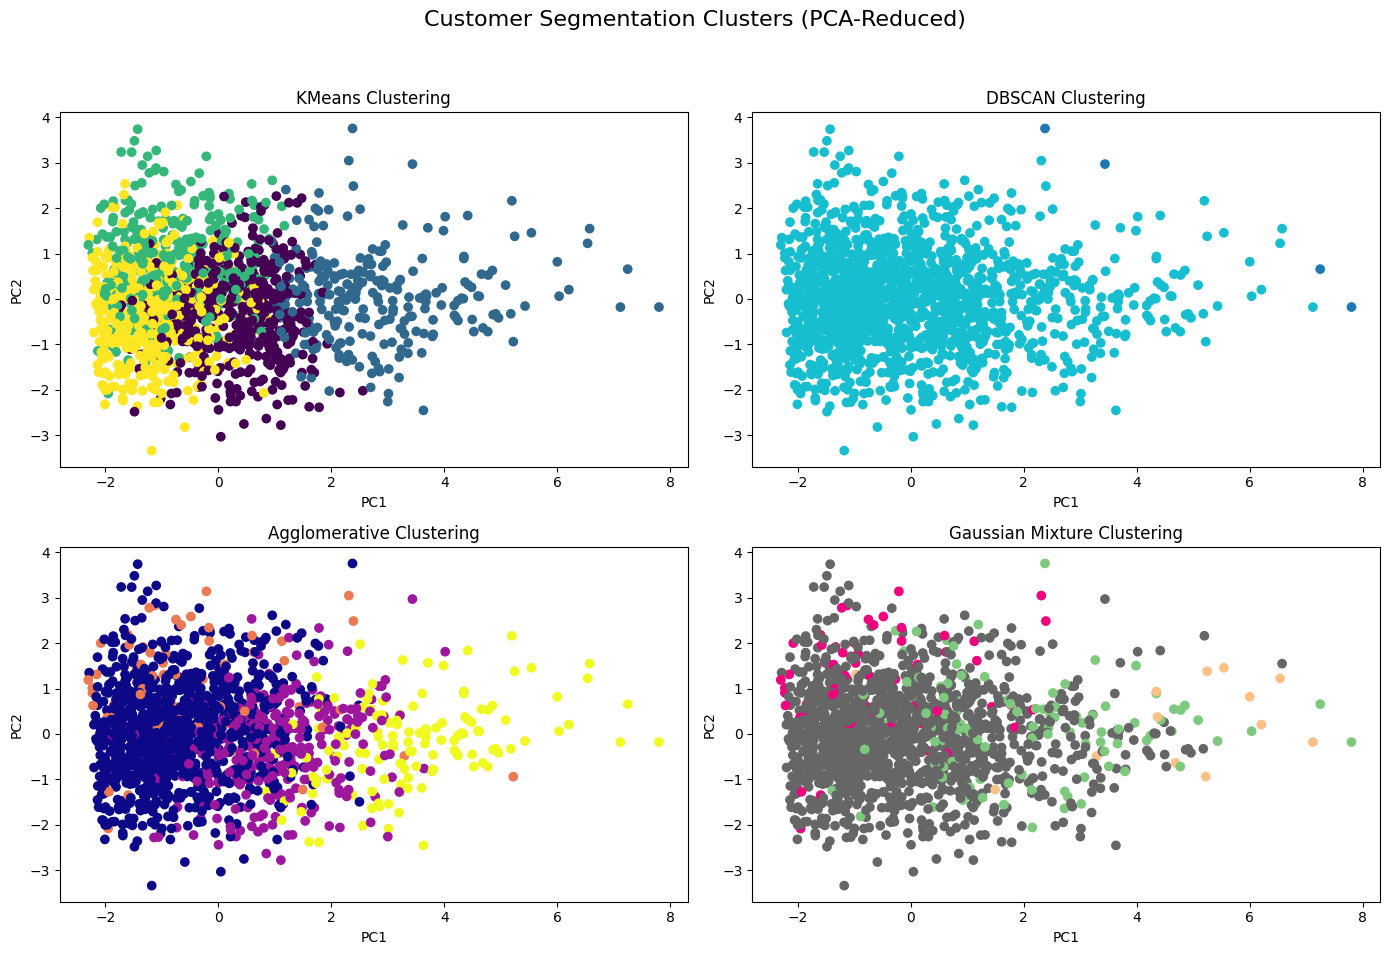

In [192]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce to 2D
pca = PCA(n_components=2)
pca_2d = pca.fit_transform(X_scaled)

# Setup for plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Customer Segmentation Clusters (PCA-Reduced)", fontsize=16)

# Plot KMeans
axes[0, 0].scatter(pca_2d[:, 0], pca_2d[:, 1], c=d['Cluster_KMeans'], cmap='viridis')
axes[0, 0].set_title("KMeans Clustering")
axes[0, 0].set_xlabel("PC1")
axes[0, 0].set_ylabel("PC2")

# Plot DBSCAN
axes[0, 1].scatter(pca_2d[:, 0], pca_2d[:, 1], c=d['Cluster-Dbscan'], cmap='tab10')
axes[0, 1].set_title("DBSCAN Clustering")
axes[0, 1].set_xlabel("PC1")
axes[0, 1].set_ylabel("PC2")

# Plot Agglomerative
axes[1, 0].scatter(pca_2d[:, 0], pca_2d[:, 1], c=d['Cluster-Agglomerative'], cmap='plasma')
axes[1, 0].set_title("Agglomerative Clustering")
axes[1, 0].set_xlabel("PC1")
axes[1, 0].set_ylabel("PC2")

# Plot Gaussian Mixture
axes[1, 1].scatter(pca_2d[:, 0], pca_2d[:, 1], c=d['Cluster-Guassian'], cmap='Accent')
axes[1, 1].set_title("Gaussian Mixture Clustering")
axes[1, 1].set_xlabel("PC1")
axes[1, 1].set_ylabel("PC2")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for suptitle
plt.show()




In [193]:
print(np.mean(X_scaled, axis=0))
print(np.std(X_scaled, axis=0))

print(d.columns)


[ 8.85892246e-17 -4.11511237e-17 -1.60032148e-17  3.08633428e-17
  4.57234708e-18 -9.43046585e-17 -2.97202560e-16  1.42885846e-16
  1.14308677e-17  5.02958178e-17 -1.82893883e-17 -6.53845632e-16
 -3.42926031e-17 -7.88729871e-17  9.64765233e-16 -1.39456586e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Index(['Customer_id', 'Age', 'gender', 'location', 'income', 'device',
       'sessions_per_week', 'loyalty_score', 'avg_time_spent_mins',
       'return_rate', 'is_fraudulent', 'total_spent', 'avg_basket_size',
       'num_transactions', 'unique_products', 'avg_rating_given',
       'num_products_rated', 'Cluster_KMeans', 'Cluster-Dbscan',
       'Cluster-Agglomerative', 'Cluster-Guassian'],
      dtype='object')


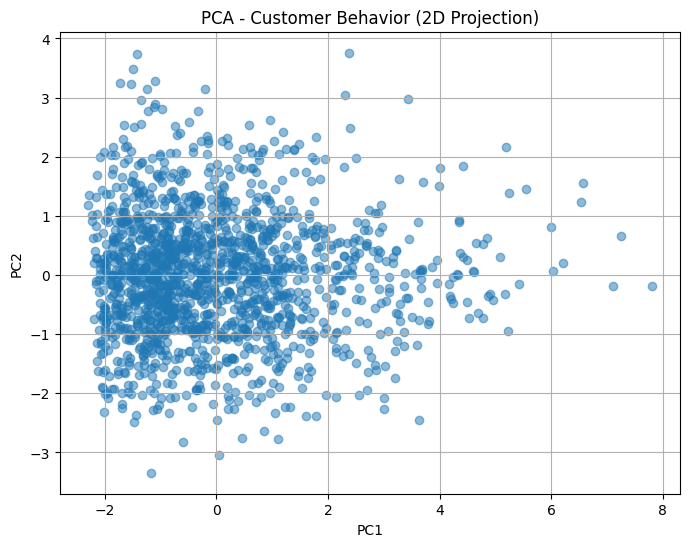

Explained variance ratio: [0.16058259 0.07000447]


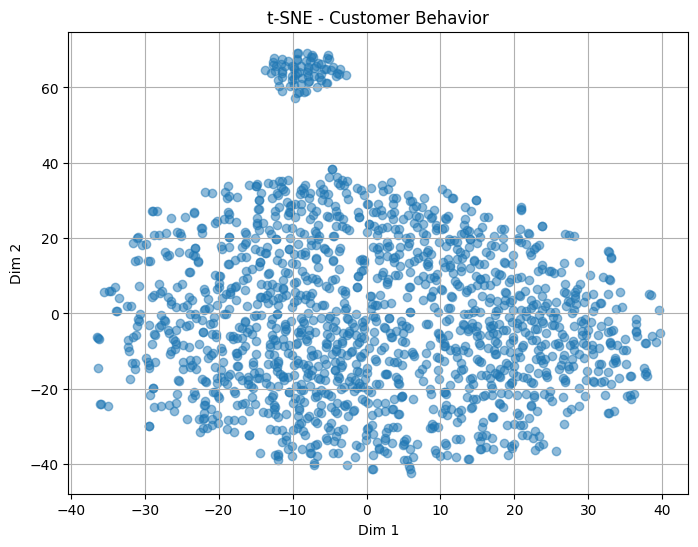

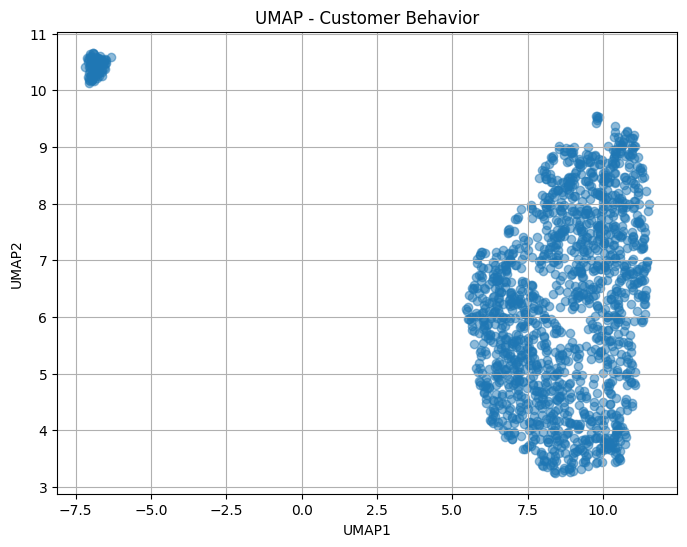

In [194]:
#step-2 Dimensionality reduction---PCA/T-SNE-UMAP
#PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], alpha=0.5)
plt.title("PCA - Customer Behavior (2D Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

print("Explained variance ratio:", pca.explained_variance_ratio_)

#t-sne
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_components = tsne.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], alpha=0.5)
plt.title("t-SNE - Customer Behavior")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.grid(True)
plt.show()

#umap
import umap.umap_ as umap

reducer = umap.UMAP(n_components=2, random_state=42)
umap_components = reducer.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(umap_components[:, 0], umap_components[:, 1], alpha=0.5)
plt.title("UMAP - Customer Behavior")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.grid(True)
plt.show()




In [200]:
#for apriopri and fpgrowth


# Step 1: Group by transaction and product to get total quantity per item per transaction-----------to check
grouped = transaction.groupby(['transaction_id', 'product_id'])['quantity'].sum().reset_index()
print(grouped.head(10))




# Group and pivot
grouped = d_transactions.groupby(['transaction_id', 'product_id'])['quantity'].sum().reset_index()

basket_matrix = grouped.pivot_table(
    index='transaction_id',
    columns='product_id',
    values='quantity',
    aggfunc='sum'
).fillna(0)


#basket_matrix = (basket_matrix > 0).astype(int)

basket_matrix_bool = (basket_matrix > 0).astype(bool)

basket_matrix.to_csv("basket_matrix.csv")

print("✅ basket_matrix.csv created! Shape:", basket_matrix.shape)
print("Total products purchased:", basket_matrix.values.sum())
print("Avg products per transaction:", basket_matrix.sum(axis=1).mean())


from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth

# Apriori
frequent_itemsets_ap = apriori(basket_matrix_bool, min_support=0.001, use_colnames=True)
rules_ap = association_rules(frequent_itemsets_ap, metric="lift", min_threshold=0.5)
print("Apriori Rules:", rules_ap.shape)

# FP-Growth
frequent_itemsets_fp = fpgrowth(basket_matrix_bool, min_support=0.001, use_colnames=True)
rules_fp = association_rules(frequent_itemsets_fp, metric="lift", min_threshold=0.5)
print("FP-Growth Rules:", rules_fp.shape)





  transaction_id product_id  quantity
0      TXN100000   PROD1009         6
1      TXN100000   PROD1060         5
2      TXN100000   PROD1111         1
3      TXN100000   PROD1154         3
4      TXN100000   PROD1180         5
5      TXN100000   PROD1247         2
6      TXN100001   PROD1067         7
7      TXN100001   PROD1086         2
8      TXN100001   PROD1199         2
9      TXN100002   PROD1015         4
✅ basket_matrix.csv created! Shape: (3000, 300)
Total products purchased: 36221.0
Avg products per transaction: 12.073666666666666
Apriori Rules: (1136, 14)
FP-Growth Rules: (1136, 14)


     antecedents consequents   support  confidence       lift
292   (PROD1159)  (PROD1043)  0.001333    0.137931  11.183597
293   (PROD1043)  (PROD1159)  0.001333    0.108108  11.183597
411   (PROD1157)  (PROD1057)  0.001333    0.114286  10.714286
410   (PROD1057)  (PROD1157)  0.001333    0.125000  10.714286
1092  (PROD1246)  (PROD1279)  0.001667    0.156250  10.416667
1093  (PROD1279)  (PROD1246)  0.001667    0.111111  10.416667
465   (PROD1064)  (PROD1148)  0.001000    0.103448   9.404389
464   (PROD1148)  (PROD1064)  0.001000    0.090909   9.404389
818   (PROD1134)  (PROD1244)  0.001333    0.125000   9.375000
819   (PROD1244)  (PROD1134)  0.001333    0.100000   9.375000


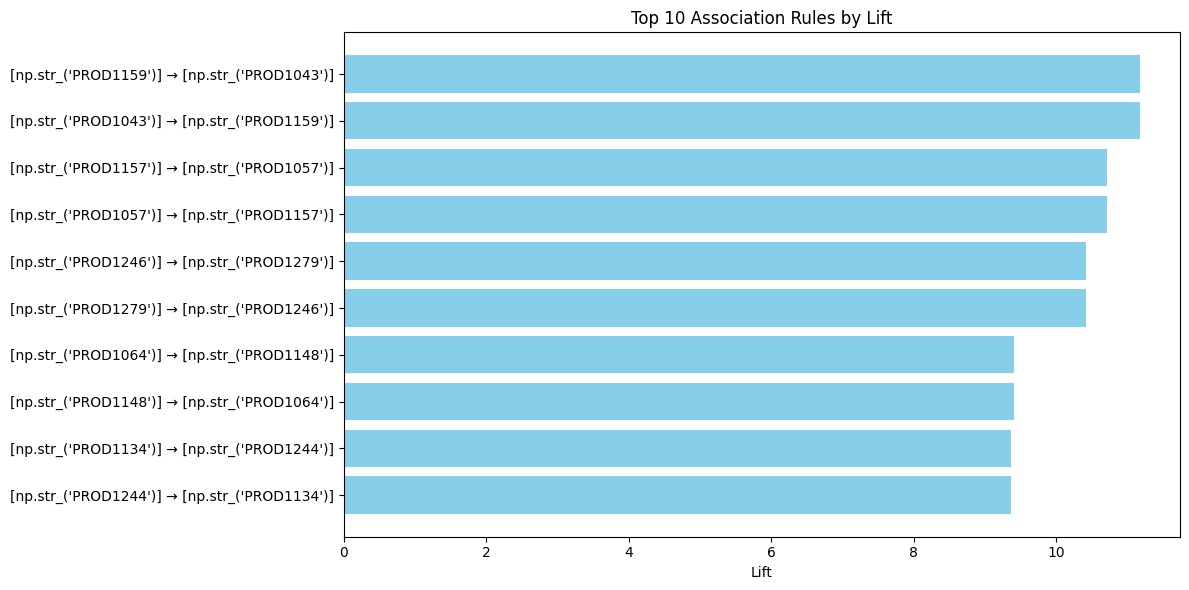

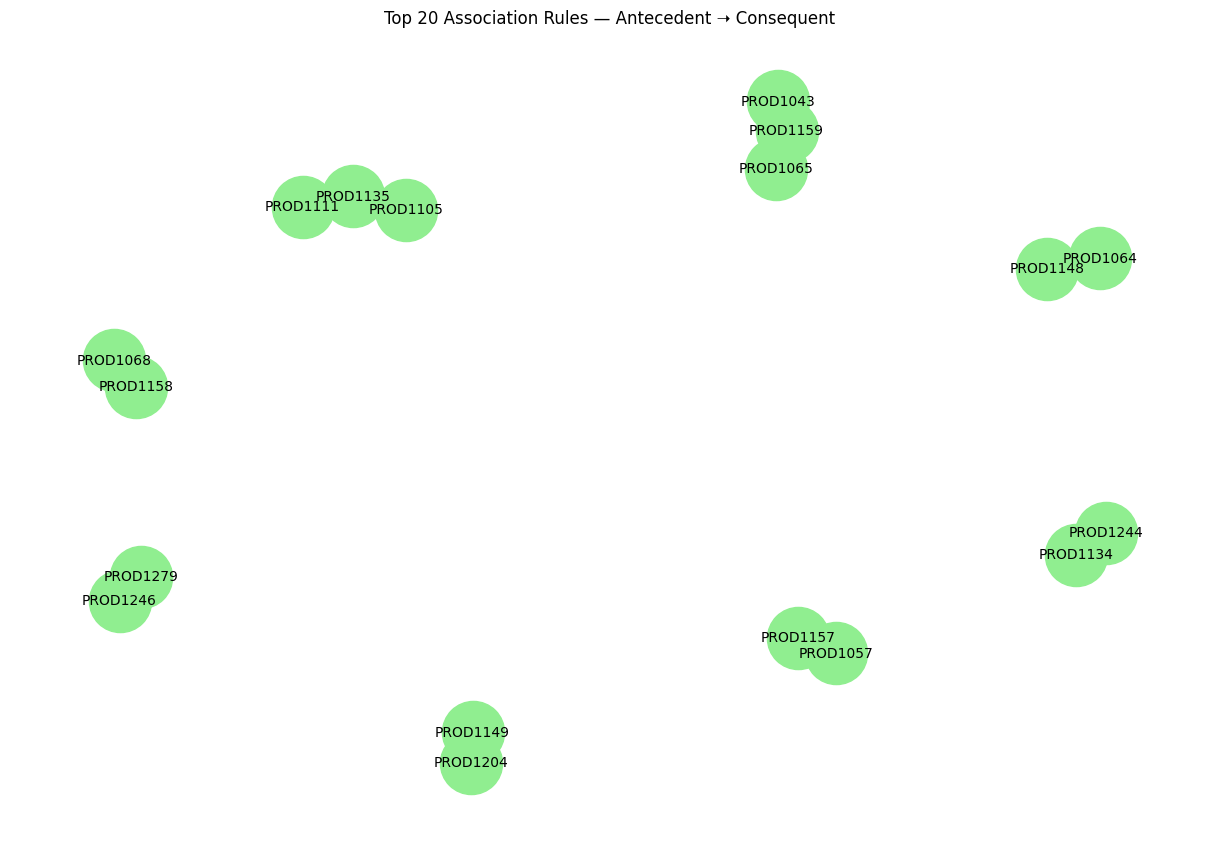

In [204]:
print(rules_ap[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(
    by='lift', ascending=False).head(10))

#Step 1: 📊 Bar Chart — Top 10 Rules by Lift
import matplotlib.pyplot as plt

# Sort by lift and get top 10 rules
top_rules = rules_ap.sort_values(by='lift', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(range(len(top_rules)), top_rules['lift'], color='skyblue')
plt.yticks(range(len(top_rules)), [
    f"{list(a)} → {list(c)}"
    for a, c in zip(top_rules['antecedents'], top_rules['consequents'])
])
plt.xlabel('Lift')
plt.title('Top 10 Association Rules by Lift')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#Step 2: 🌐 Network Graph of Rules
import networkx as nx

# Use top 20 rules
top_rules_nx = rules_ap.sort_values(by='lift', ascending=False).head(20)

G = nx.DiGraph()

for _, row in top_rules_nx.iterrows():
    for ante in row['antecedents']:
        for cons in row['consequents']:
            G.add_edge(ante, cons, weight=row['lift'])

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5)
edges = G.edges()
weights = [G[u][v]['weight'] for u, v in edges]

# Draw
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightgreen",
        edge_color=weights, edge_cmap=plt.cm.Blues, width=2, font_size=10)
plt.title("Top 20 Association Rules — Antecedent ➝ Consequent")
plt.show()


In [205]:
#Recommendation
#Step 1: Choose or input a customer basket
# Example basket (items customer bought)
customer_basket = {'PROD1012', 'PROD1055'}

#Step 2: Filter rules where antecedents ⊆ customer_basket
from mlxtend.frequent_patterns import association_rules

# Choose rules — from Apriori or FP-Growth
rules = rules_ap  # or rules_fp

# Convert frozensets to sets for easier comparison
rules['antecedents'] = rules['antecedents'].apply(lambda x: set(x))
rules['consequents'] = rules['consequents'].apply(lambda x: set(x))

# Filter where antecedents are subset of the basket
recommended_rules = rules[rules['antecedents'].apply(lambda x: x.issubset(customer_basket))]

# Sort by confidence/lift
recommended_rules = recommended_rules.sort_values(by='confidence', ascending=False)

# Show top recommendations
print("✅ Recommendations based on basket:", customer_basket)
print(recommended_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))




#Step 3: Extract unique recommended products
recommended_products = set()
for cons in recommended_rules['consequents']:
    recommended_products.update(cons)

print("🎁 Recommend these products:", recommended_products - customer_basket)



✅ Recommendations based on basket: {'PROD1055', 'PROD1012'}
    antecedents consequents   support  confidence      lift
93   {PROD1012}  {PROD1093}  0.001333    0.097561  6.651885
95   {PROD1012}  {PROD1173}  0.001333    0.097561  6.651885
101  {PROD1012}  {PROD1284}  0.001333    0.097561  6.362672
395  {PROD1055}  {PROD1221}  0.001333    0.086957  5.797101
388  {PROD1055}  {PROD1150}  0.001333    0.086957  6.362672
🎁 Recommend these products: {np.str_('PROD1221'), np.str_('PROD1210'), np.str_('PROD1170'), np.str_('PROD1093'), np.str_('PROD1149'), np.str_('PROD1258'), np.str_('PROD1276'), np.str_('PROD1173'), np.str_('PROD1001'), np.str_('PROD1226'), np.str_('PROD1284'), np.str_('PROD1279'), np.str_('PROD1150'), np.str_('PROD1126')}


In [207]:
#Anomoly Detection


import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("customer_behavior.csv")

# Keep a copy of customer IDs for reference
customer_ids = df['Customer_id']

# Drop ID column
X = df.drop('Customer_id', axis=1)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



#1.Isolation forest
from sklearn.ensemble import IsolationForest

iso = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df['Anomaly_IF'] = iso.fit_predict(X_scaled)  # -1 = anomaly, 1 = normal

#2.One-Class SVM:
from sklearn.svm import OneClassSVM

svm = OneClassSVM(nu=0.05, kernel='rbf', gamma='scale')
df['Anomaly_SVM'] = svm.fit_predict(X_scaled)  # -1 = anomaly

#Local Outlier Factor:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df['Anomaly_LOF'] = lof.fit_predict(X_scaled)  # -1 = anomaly




# Map for clarity: 1 → Normal, -1 → Anomaly
df['Anomaly_IF'] = df['Anomaly_IF'].map({1: 0, -1: 1})
df['Anomaly_SVM'] = df['Anomaly_SVM'].map({1: 0, -1: 1})
df['Anomaly_LOF'] = df['Anomaly_LOF'].map({1: 0, -1: 1})

# Count anomalies
print("Isolation Forest:", df['Anomaly_IF'].sum())
print("One-Class SVM   :", df['Anomaly_SVM'].sum())
print("LOF             :", df['Anomaly_LOF'].sum())

# Save
df.to_csv("customer_behavior_with_anomalies.csv", index=False)



Isolation Forest: 100
One-Class SVM   : 104
LOF             : 100


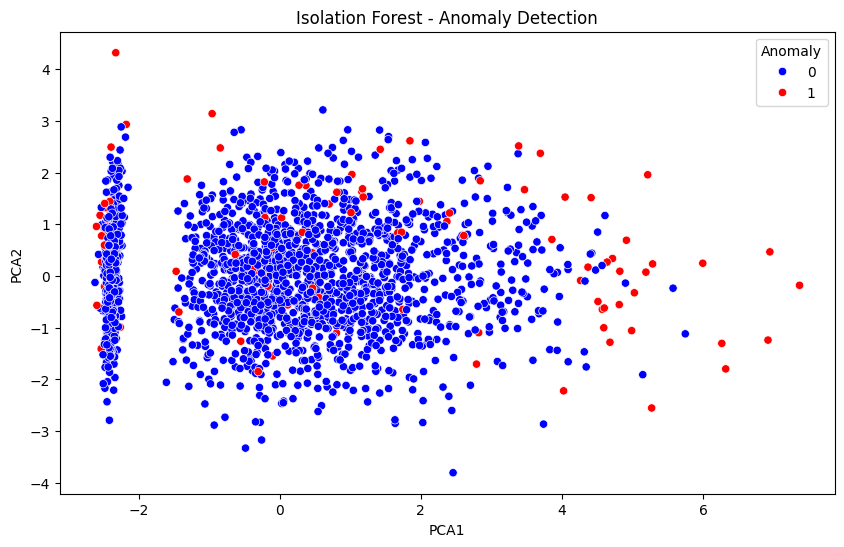

   Customer_id  total_spent  num_transactions  avg_rating_given
4     CUST1004    232982.96               6.0          4.600000
22    CUST1022     46989.27               5.0          3.944444
28    CUST1028    632314.31              19.0          4.250000
36    CUST1036         0.00               0.0          3.875000
42    CUST1042    488549.43              18.0          3.800000
Strong anomalies detected by 2+ models: 92


In [208]:
#Visualize Anomalies (Recommended)
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce to 2D for plotting
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

# Plot Isolation Forest anomalies
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Anomaly_IF', palette={0: 'blue', 1: 'red'})
plt.title("Isolation Forest - Anomaly Detection")
plt.legend(title="Anomaly")
plt.show()


#View Anomalous Customers
# View suspicious customers
anomalies = df[df['Anomaly_IF'] == 1]
print(anomalies[['Customer_id', 'total_spent', 'num_transactions', 'avg_rating_given']].head())


#Create an Ensemble Anomaly Score
# Sum of anomaly votes
df['Anomaly_Total'] = df[['Anomaly_IF', 'Anomaly_SVM', 'Anomaly_LOF']].sum(axis=1)

# Flag as strong anomaly if detected by 2 or more
df['Anomaly_Consensus'] = (df['Anomaly_Total'] >= 2).astype(int)

# Check final
print("Strong anomalies detected by 2+ models:", df['Anomaly_Consensus'].sum())


#Save & Use in Business
df.to_csv("customer_behavior_anomaly_results.csv", index=False)




#Extract top anomalies?
#Use ensemble logic to refine anomalies?

In [209]:
#matriculation

#Step 1: Create User-Item Rating Matrix
user_item_matrix = ratings.pivot_table(
    index='customer_id',
    columns='product_id',
    values='rating'
).fillna(0)

#Step 2: Apply SVD
from sklearn.decomposition import TruncatedSVD

# Convert to matrix format
X = user_item_matrix.values

# SVD
svd = TruncatedSVD(n_components=20, random_state=42)
X_svd = svd.fit_transform(X)

print("Explained variance by top 20 components:", svd.explained_variance_ratio_.sum())

#Step 3: Apply NMF
from sklearn.decomposition import NMF

nmf = NMF(n_components=20, init='random', random_state=42)
X_nmf = nmf.fit_transform(user_item_matrix)

print("Shape of NMF latent matrix:", X_nmf.shape)


#Step 4: Recommend Products for a User (e.g., customer_id='CUST1024')
# Get customer index
cust_idx = user_item_matrix.index.get_loc('CUST1024')

# Get predicted ratings using SVD
reconstructed_ratings = np.dot(X_svd, svd.components_)
customer_ratings = reconstructed_ratings[cust_idx]

# Recommend top 5 unrated products
already_rated = user_item_matrix.iloc[cust_idx] > 0
recommendations = pd.Series(customer_ratings, index=user_item_matrix.columns)
top_recs = recommendations[~already_rated].sort_values(ascending=False).head(5)

print("🎁 Recommended Products for CUST1024:")
print(top_recs)

#Save latent features
pd.DataFrame(X_svd, index=user_item_matrix.index).to_csv("user_latent_svd.csv")
pd.DataFrame(X_nmf, index=user_item_matrix.index).to_csv("user_latent_nmf.csv")


Explained variance by top 20 components: 0.11726429987281094
Shape of NMF latent matrix: (2000, 20)
🎁 Recommended Products for CUST1024:
product_id
PROD1076    0.905278
PROD1132    0.762668
PROD1110    0.741694
PROD1233    0.694518
PROD1009    0.684967
dtype: float64


| Use Case                 | Best Algorithm(s)                    |
| ------------------------ | ------------------------------------ |
| Customer segmentation    | KMeans, GMM, Agglomerative, DBSCAN   |
| Product recommendation   | Apriori, FP-Growth, SVD, NMF         |
| Fraud detection          | Isolation Forest, LOF, One-Class SVM |
| Visualization            | PCA (fast), t-SNE, UMAP              |
| Reduce high-dim features | PCA (linear), UMAP (nonlinear)       |


Customer Behavior Analytics Using Unsupervised Learning (Python, ML)
• Built a synthetic e-commerce dataset (4 linked tables) simulating 2000+ customers and 10,000+ transactions.
• Applied clustering (KMeans, DBSCAN, GMM, Agglomerative), dimensionality reduction (PCA, t-SNE), and anomaly detection (LOF, Isolation Forest).
• Performed association rule mining (Apriori, FP-Growth) and product recommendation using matrix factorization (NMF, SVD).
• Engineered behavior features (avg basket size, loyalty, rating patterns) and created interpretable insights for customer segmentation.